In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
# Visualizing the results
import math

from sklearn.metrics import mean_squared_error

df = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=["Date"])

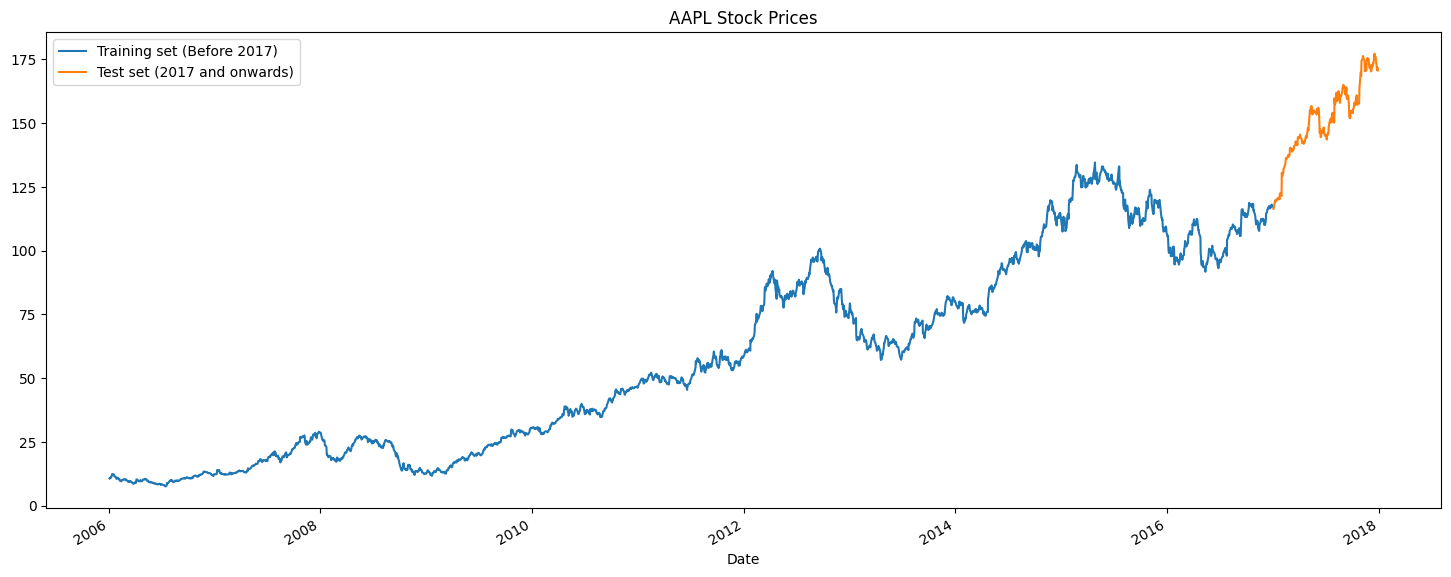

array([[0.02375726],
       [0.02775985],
       [0.0348612 ],
       ...,
       [0.7867011 ],
       [0.77495158],
       [0.77611362]])

In [3]:
df["High"][:'2016'].plot(figsize=(18, 7), legend=True)  # Training set
df["High"]['2017':].plot(figsize=(18, 7), legend=True)  # Test set
plt.legend(['Training set (Before 2017)', 'Test set (2017 and onwards)'])
plt.title('AAPL Stock Prices')
plt.show()

# Separating the data into training and test sets
training_set = df['2012-01-01':'2016-12-31'].iloc[:, 1:2].values
test_set = df['2017':].iloc[:, 1:2].values

# Feature scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled


In [4]:

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# Convert to numpy array outside the loop
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape[1]

60

In [5]:

# Building the LSTM model
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

# Additional LSTM layers with Dropout regularisation
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

# Output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model to the training set
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 6s 44ms/step - loss: 0.0431
Epoch 2/50
38/38 [==============================] - 2s 44ms/step - loss: 0.0119
Epoch 3/50
38/38 [==============================] - 2s 44ms/step - loss: 0.0107
Epoch 4/50
38/38 [==============================] - 2s 44ms/step - loss: 0.0100
Epoch 5/50
38/38 [==============================] - 2s 44ms/step - loss: 0.0099
Epoch 6/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0086
Epoch 7/50
38/38 [==============================] - 2s 44ms/step - loss: 0.0081
Epoch 8/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0079
Epoch 9/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0082
Epoch 10/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0076
Epoch 11/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0079
Epoch 12/50
38/38 [==============================] - 2s 45ms/step - loss: 0.0072
Epoch 13/50
38/38 [==================

In [6]:

# Preparing the test data
dataset_total = pd.concat((df["High"][:'2016'], df["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting the stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 1s 15ms/step


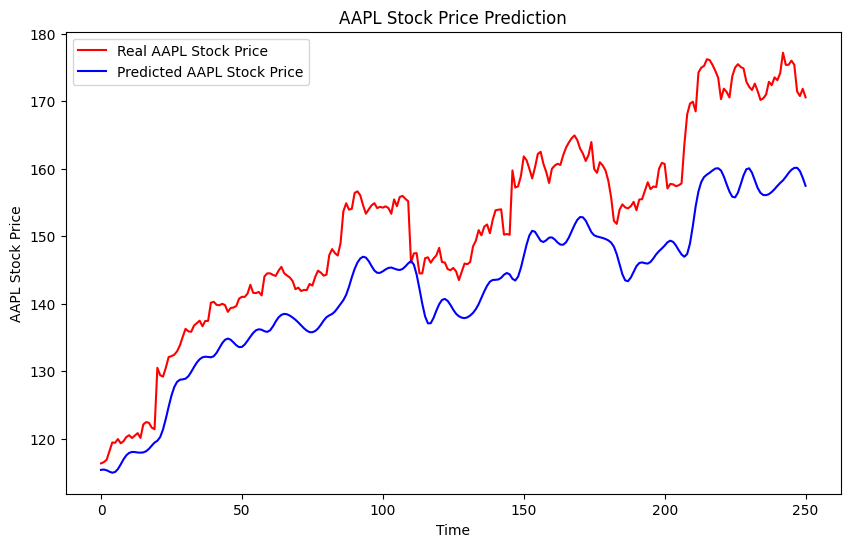

The root mean sqaured error is 10.139636294092755.


In [7]:



def plot_prediction(test, prediction):
    plt.figure(figsize=(10,6))
    plt.plot(test, color='red', label="Real AAPL Stock Price")
    plt.plot(prediction, color="blue", label="Predicted AAPL Stock Price")
    plt.title("AAPL Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("AAPL Stock Price")
    plt.legend()
    plt.show()

# Use this function to visualize our test and predicted data
plot_prediction(test_set, predicted_stock_price)

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test,predicted))
    print("The root mean sqaured error is {}.".format(rmse))

return_rmse(test_set, predicted_stock_price)